In [1]:
from vide import Vide as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import stan
import nest_asyncio

In [2]:
nest_asyncio.apply()

In [3]:
# Calculate the HPDI from posteriori samples

samples = np.random.normal(0, 1, 1000)
v.HPDI(samples)

(-1.5726489346024375, 1.644795314037996)

In [4]:
# Generate samples from posterioris to alpha and beta
alpha = np.random.normal(0, 0.2, 250)
beta = np.random.normal(1, 0.5, 250)

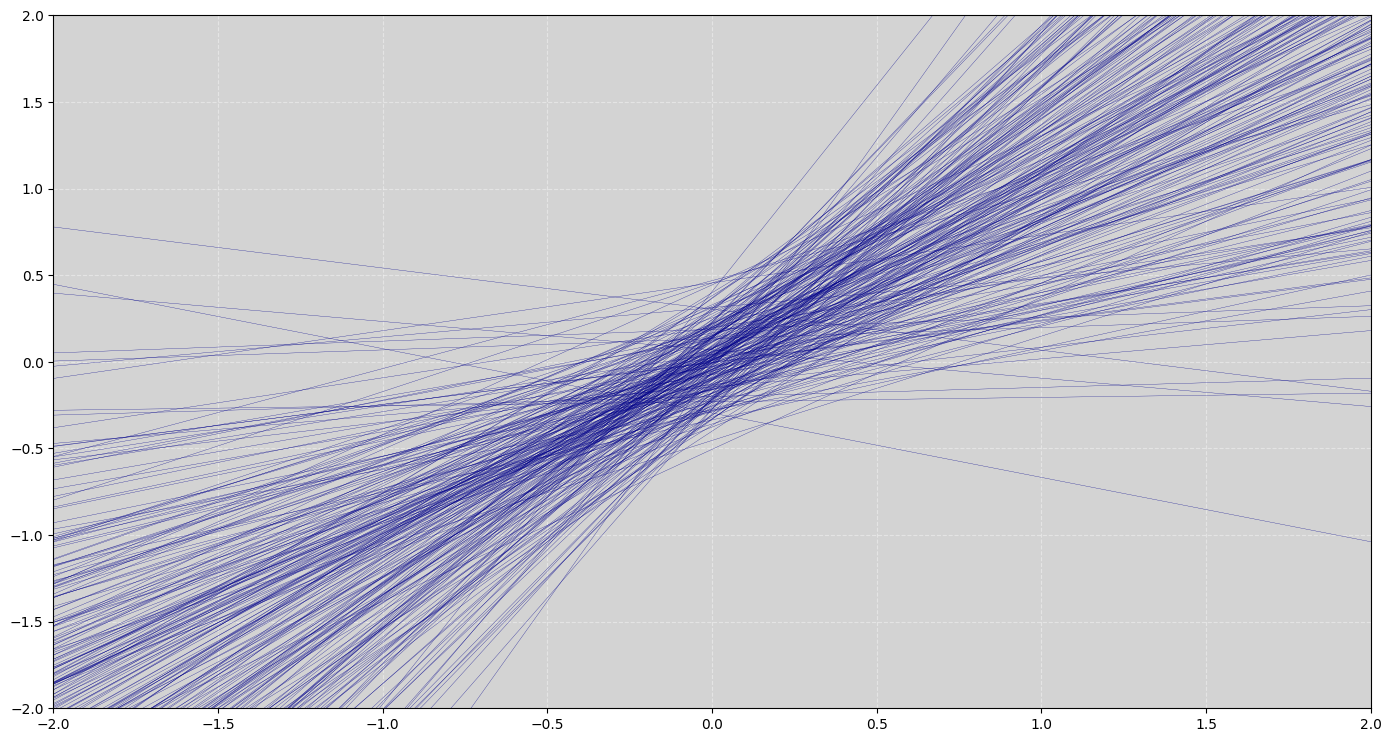

In [5]:
# Plot spaghetti 
v.plot_lines(alpha, beta)
plt.show()

In [6]:
# Calculate the μ and CI from posteriori
mu = v.mu_lm(alpha, beta)  # Line average
ci = v.CI_lm(alpha, beta)  # Compatibility Interval

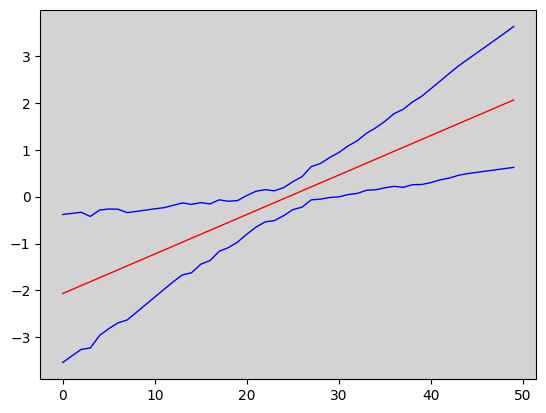

In [7]:
# Ploting results
plt.plot(ci[:, 0], 'b', lw=1)  # lower line,default 89%
plt.plot(ci[:, 1], 'b', lw=1)  # upper line, default 89%
plt.plot(mu, 'r', lw=1)

plt.show()

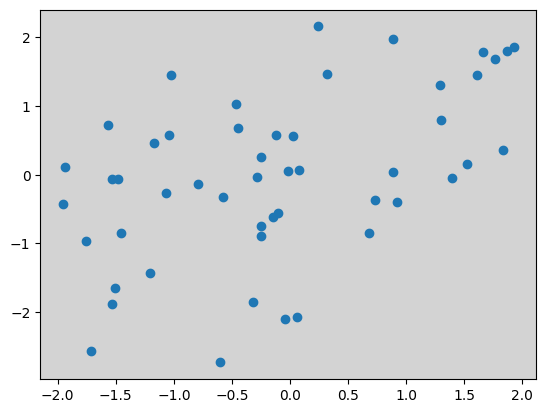

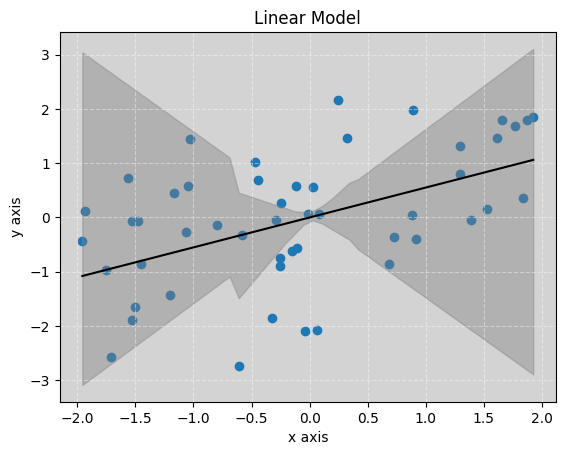

In [8]:
# Plot linear model posteriori

N = 50
alpha = np.random.normal(0, 0.05, N)
beta = np.random.normal(0.5, 1, N)
disturb = np.random.normal(0, 1, N)

predictor = np.random.uniform(-2, 2, N)
outcome = np.mean(alpha) + np.mean(beta) * predictor + disturb

plt.plot(predictor, outcome, 'o')
plt.show()

# =============
v.plot_lm(outcome, predictor, alpha, beta, 
          title='Linear Model',
          xlabel='x axis',
          ylabel='y axis')
plt.show()

In [9]:
model = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(0, 0.5);  // Prioris
        beta ~ normal(0, 0.02);  // Prioris
        sigma ~ exponential(1);  // Prioris
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data = {
    'N': len(outcome),
    'outcome': outcome,
    'predictor': predictor,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_5buuvpo6/model_sjuvmpm7.stan', line 16, column 25: Argument 0.02 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan__cap0n3

In [10]:
v.plot_forest(samples)

'In build process'